## Real Estate (99acres.com) Price Analysis

## 1. Import Libraries

In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import warnings
warnings.filterwarnings('ignore')

## 2. Load the Dataset

In [118]:
prop = pd.read_csv('Datasets/Property.csv')

### 2.1 Know more about dataset

In [119]:
prop.head()

,Property_Name,Location,Region,Property_Age,Availability,Area_Tpye,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
0,Omkar Alta Monte,Arunachal Pradesh,Arunachal Pradesh,0 to 1 Year,Ready To Move,Super Built Up Area,2900.0,17241,14,3,4,500.0
1,T Bhimjyani Neelkanth Woods,Arunachal Pradesh,Arunachal Pradesh,1 to 5 Year,Ready To Move,Super Built Up Area,1900.0,12631,8,3,3,240.0
2,Legend 1 Pramila Nagar,Arunachal Pradesh,Arunachal Pradesh,10+ Year,Ready To Move,Super Built Up Area,595.0,15966,3,1,2,95.0
3,Unnamed Property,Arunachal Pradesh,Arunachal Pradesh,5 to 10 Year,Ready To Move,Built Up Area,1450.0,25862,1,3,3,375.0
4,Unnamed Property,Arunachal Pradesh,Arunachal Pradesh,5 to 10 Year,Ready To Move,Carpet Area,876.0,39954,5,2,2,350.0


In [120]:
prop.shape

(2580, 12)

In [121]:
prop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Property_Name  2580 non-null   object 
 1   Location       2580 non-null   object 
 2   Region         2580 non-null   object 
 3   Property_Age   2580 non-null   object 
 4   Availability   2580 non-null   object 
 5   Area_Tpye      2580 non-null   object 
 6   Area_SqFt      2580 non-null   float64
 7   Rate_SqFt      2580 non-null   int64  
 8   Floor_No       2580 non-null   int64  
 9   Bedroom        2580 non-null   int64  
 10  Bathroom       2580 non-null   int64  
 11  Price_Lakh     2580 non-null   float64
dtypes: float64(2), int64(4), object(6)
memory usage: 242.0+ KB


In [122]:
prop.Availability.value_counts()

Availability
Ready To Move         2565
Under Construction      15
Name: count, dtype: int64

In [123]:
prop.Region.value_counts().head(20)

Region
Chandigarh      200
Bangalore       100
Bhubaneshwar    100
Nagaland        100
Mumbai          100
Bhopal          100
Trivandum       100
Hyderabad       100
Ranchi          100
Shimla          100
Gandhinagar     100
Chennai         100
Panaji          100
Raipur          100
Patna           100
Agartala        100
Dehradun        100
Lucknow         100
Kolkata         100
Jaipur          100
Name: count, dtype: int64

In [124]:
prop.Region.nunique()

28

In [125]:
prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2580.00,2580.00,2580.00,2580.00,2580.00,2580.00
mean,1026.11,19111.85,8.84,1.96,2.07,174.39
std,2287.13,40760.88,8.10,0.84,0.75,369.48
min,33.57,84.00,-1.00,1.00,1.00,13.00
25%,630.75,8791.75,3.00,1.00,2.00,67.00
50%,850.00,13785.00,6.00,2.00,2.00,111.50
75%,1156.00,22650.00,12.00,2.00,2.00,200.00
max,100000.00,1650000.00,59.00,6.00,7.00,16500.00


In [126]:
Q1 = np.quantile(prop.Area_SqFt,0.02)
Q3 = np.quantile(prop.Area_SqFt,0.98)
med = np.median(prop.Area_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = prop.Area_SqFt[(prop.Area_SqFt <= lower_bound) | (prop.Area_SqFt >= upper_bound)]

prop = prop.drop(outliers1.index).reset_index(drop=True)

In [127]:
Q1 = np.quantile(prop.Rate_SqFt,0.02)
Q3 = np.quantile(prop.Rate_SqFt,0.80)
med = np.median(prop.Rate_SqFt)
IQR = Q3 - Q1
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers1 = prop.Rate_SqFt[(prop.Rate_SqFt <= lower_bound) | (prop.Rate_SqFt >= upper_bound)]

prop = prop.drop(outliers1.index).reset_index(drop=True)

In [128]:
prop.describe().round(2)

,Area_SqFt,Rate_SqFt,Floor_No,Bedroom,Bathroom,Price_Lakh
count,2538.00,2538.00,2538.00,2538.00,2538.00,2538.00
mean,948.95,16546.14,8.79,1.95,2.05,161.27
std,486.53,10192.02,7.98,0.83,0.73,162.12
min,185.00,1808.00,-1.00,1.00,1.00,13.00
25%,634.25,8762.25,3.00,1.00,2.00,66.25
50%,850.00,13629.50,6.00,2.00,2.00,110.00
75%,1150.00,22278.75,12.00,2.00,2.00,196.75
max,5000.00,55611.00,55.00,6.00,7.00,1900.00


In [129]:
prop.duplicated().sum()

4

In [130]:
prop = prop.drop_duplicates(ignore_index=True)

In [131]:
prop.isna().sum()

Property_Name    0
Location         0
Region           0
Property_Age     0
Availability     0
Area_Tpye        0
Area_SqFt        0
Rate_SqFt        0
Floor_No         0
Bedroom          0
Bathroom         0
Price_Lakh       0
dtype: int64

In [132]:
prop.shape

(2534, 12)

In [133]:
prop.to_csv('Datasets/Final_Project.csv', index_label = False)
prop = pd.read_csv('Final_Project.csv')

## 3. Data Visualization

### 3.1 Set the rcParams for all next Visualization

In [134]:
rcParams = {'xtick.labelsize':'14','ytick.labelsize':'14','axes.labelsize':'16'}

### 3.2 Hunting Outliers

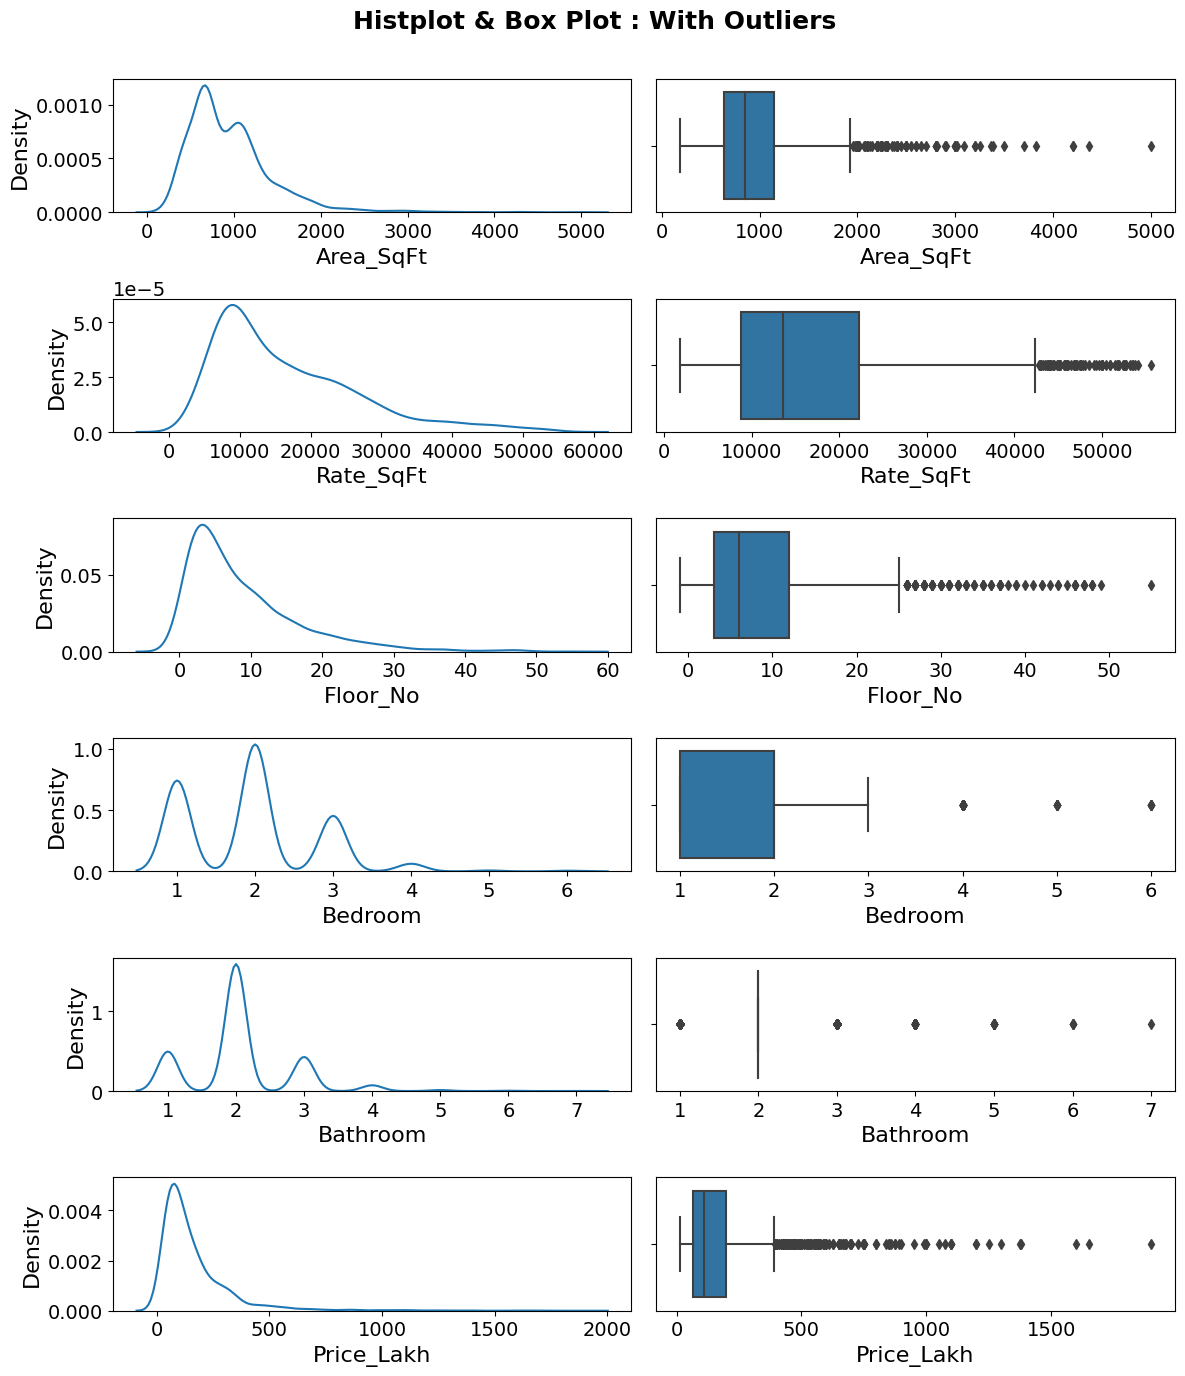

In [135]:
fig, ax = plt.subplots(6,2, figsize = (12,14))

fig.suptitle('Histplot & Box Plot : With Outliers', size = 18, fontweight="bold")
sns.kdeplot(ax= ax[0,0], data = prop, x = 'Area_SqFt')
sns.boxplot(ax= ax[0,1], data = prop, x = 'Area_SqFt')
sns.kdeplot(ax= ax[1,0], data = prop, x = 'Rate_SqFt')
sns.boxplot(ax= ax[1,1], data = prop, x = 'Rate_SqFt')
sns.kdeplot(ax= ax[2,0], data = prop, x = 'Floor_No')
sns.boxplot(ax= ax[2,1], data = prop, x = 'Floor_No')
sns.kdeplot(ax= ax[3,0], data = prop, x = 'Bedroom')
sns.boxplot(ax= ax[3,1], data = prop, x = 'Bedroom')
sns.kdeplot(ax= ax[4,0], data = prop, x = 'Bathroom')
sns.boxplot(ax= ax[4,1], data = prop, x = 'Bathroom')
sns.kdeplot(ax= ax[5,0], data = prop, x = 'Price_Lakh')
sns.boxplot(ax= ax[5,1], data = prop, x = 'Price_Lakh')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Outliers', dpi = 500)

## Obeservation :
**Based on data following colums has most outliers & mostly right skewed data:**

- Price_Lakh
- Area_SqFt
- Rate_SqFt
- Floor_No

## 5. Exploratory Data Analysis
    Convert all variable into following categories

    1 Binary Variables
    2 Ordinal Varibles
    3 Continous Data
    4 Target Variable

### 5.1 Checking for Binary, Oridinal, Continous Data & Target Column

In [136]:
num_columns = prop.describe().columns
categorical_cols = prop.describe(include= 'object').columns

In [137]:
prop.nunique()

Property_Name     894
Location           28
Region             28
Property_Age       12
Availability        2
Area_Tpye           4
Area_SqFt         696
Rate_SqFt        1990
Floor_No           52
Bedroom             6
Bathroom            7
Price_Lakh        467
dtype: int64

In [138]:
binary_variables = [i  for i in prop.columns  if (len(prop[i].unique()) == 2)]

In [139]:
binary_variables

['Availability']

In [140]:
ordinal_variables=[i for i in prop.columns if ((len(prop[i].unique()) > 2 ) and (len(prop[i].unique()) <= 53))]

In [141]:
ordinal_variables

['Location',
 'Region',
 'Property_Age',
 'Area_Tpye',
 'Floor_No',
 'Bedroom',
 'Bathroom']

In [142]:
continous_variable = [i for i in prop.columns if ((len(prop[i].unique()) > 53))]
continous_variable = continous_variable[3:-1] # Remove Price and Location from data

In [143]:
continous_variable

[]

In [144]:
target_variable = 'Price_Lakh'

In [145]:
target_variable

'Price_Lakh'

## 6. Binary Variable

In [146]:
print(binary_variables)
print('Element in binary category :', len(binary_variables))

['Availability']
Element in binary category : 1


### 6.1 Availability Count

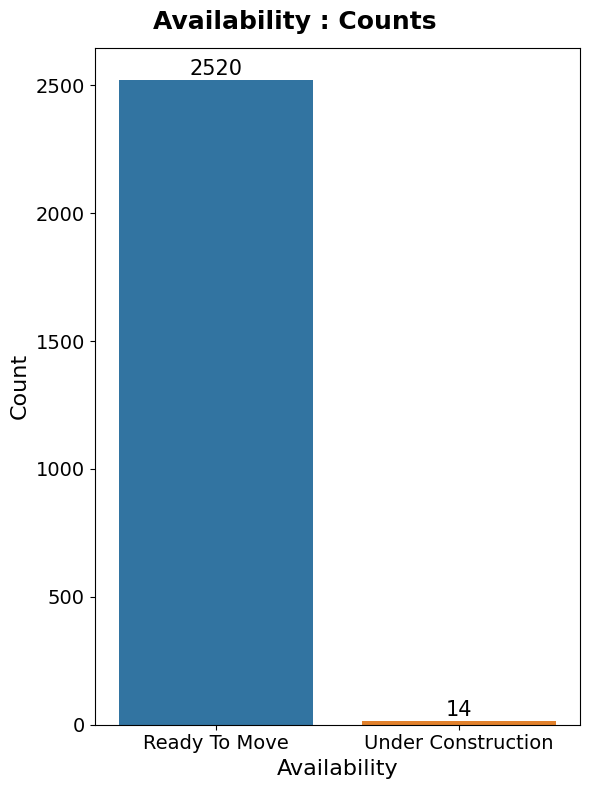

In [147]:
fig = plt.figure(figsize=(6,8))

plot = sns.barplot(data =prop , x = prop.Availability.value_counts().index,
            y = prop.Availability.value_counts().values)
for bar in plot.patches:
    plot.annotate(format(bar.get_height(), '.0f'),(bar.get_x() + bar.get_width()/2, bar.get_height()),
                  ha='center', va='center', size=15, xytext=(0,8), textcoords='offset points')

fig.suptitle('Availability : Counts',fontsize=18, fontweight="bold")
plt.xlabel('Availability',)
plt.ylabel('Count')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Availability_Bar', dpi = 500)

## 7. Ordinal Variables

In [148]:
print(ordinal_variables)
print('Number of ordinal features is :', len(ordinal_variables))

['Location', 'Region', 'Property_Age', 'Area_Tpye', 'Floor_No', 'Bedroom', 'Bathroom']
Number of ordinal features is : 7


### 7.1 Price with respect to Property Age

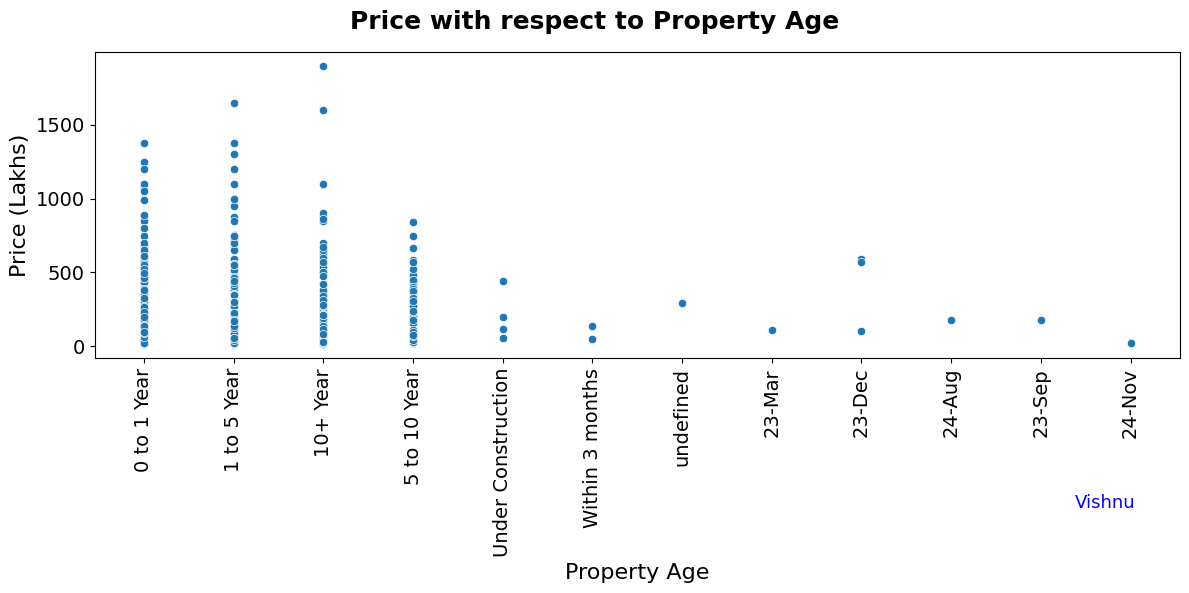

In [149]:
fig = plt.figure(figsize=(12,6))
fig.suptitle('Price with respect to Property Age', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Vishnu', fontsize = 13, color ='blue')

sns.scatterplot(data = prop , x = prop['Property_Age'], y = prop['Price_Lakh'])
plt.xlabel("Property Age", size=16)
plt.ylabel("Price (Lakhs)", size=16)
plt.xticks(rotation=90)

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Property_Age_Price_Scatter', dpi = 500)

### 7.2 Price with respect to Bed & Bath

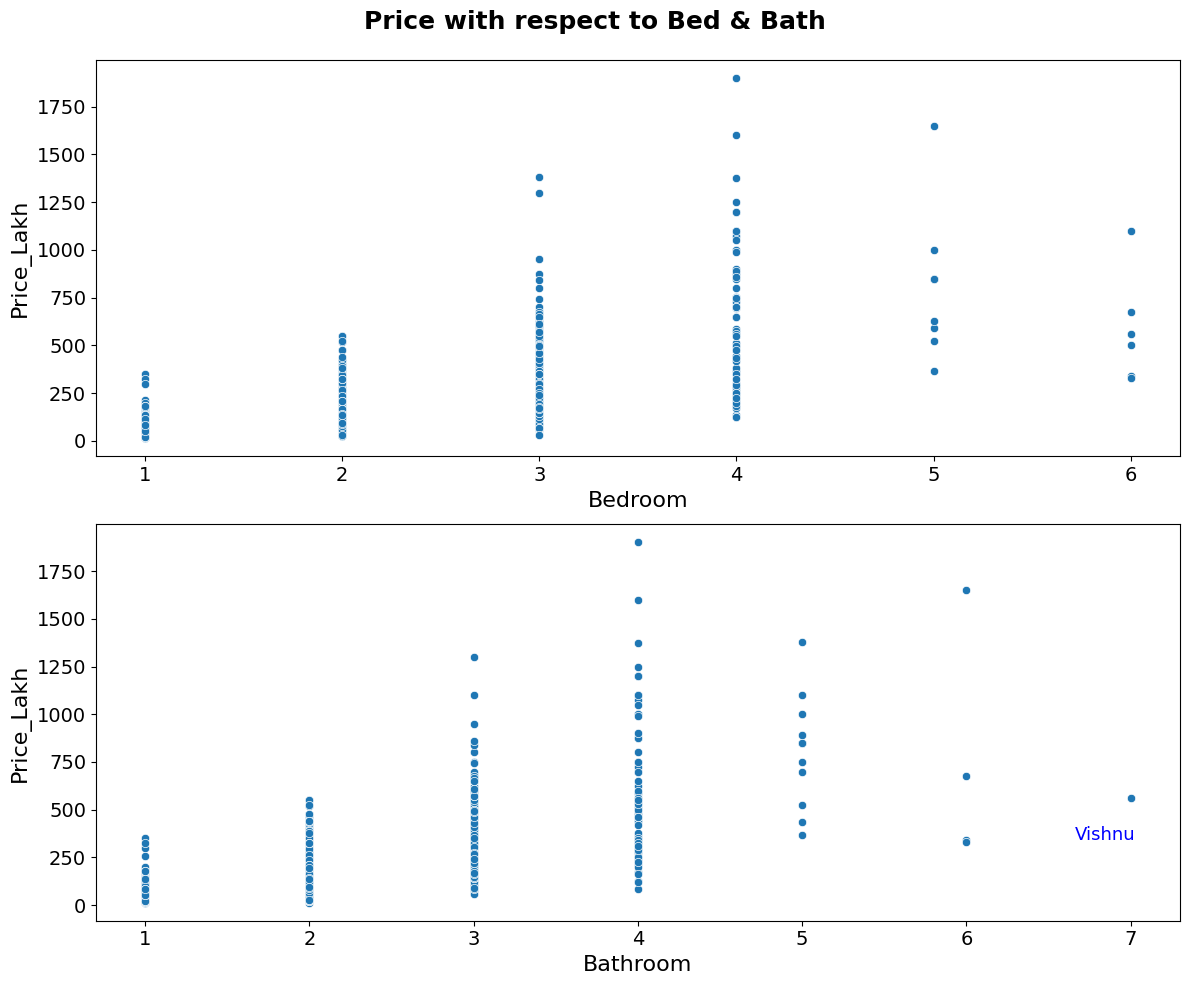

In [150]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

sns.scatterplot(ax= ax[0], data = prop , x = prop['Bedroom'], y = prop['Price_Lakh'])
sns.scatterplot(ax= ax[1], data = prop , x = prop['Bathroom'], y = prop['Price_Lakh'])
fig.suptitle('Price with respect to Bed & Bath', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Vishnu', fontsize = 13, color ='blue')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Bed_Bath_Price_Scatter', dpi = 500)

### 7.3 Area Type Distribution

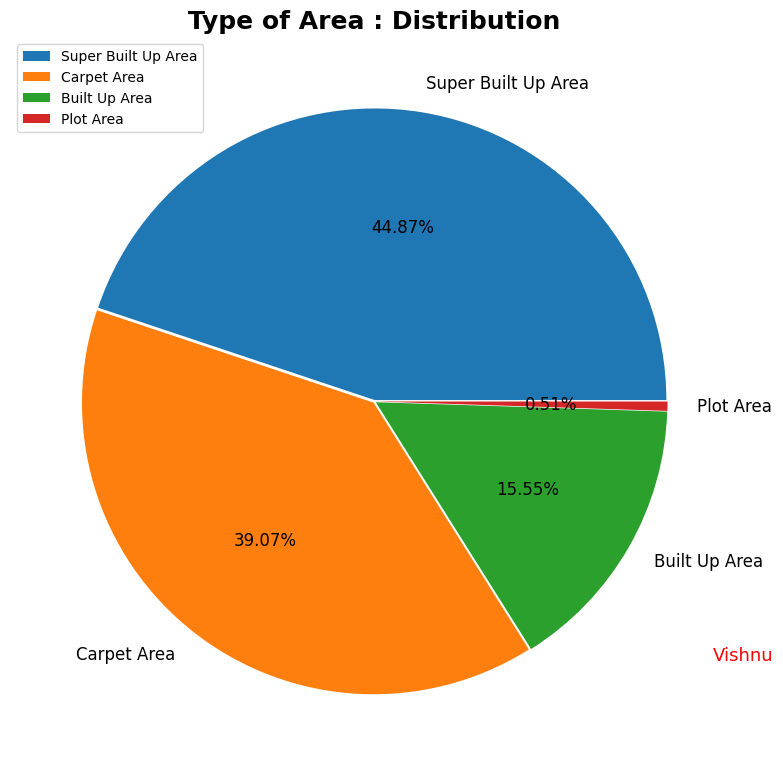

In [151]:
fig = plt.figure(figsize = (8,8))
plt.pie(prop['Area_Tpye'].value_counts(),
       labels=['Super Built Up Area','Carpet Area','Built Up Area','Plot Area'],
       autopct= '%.2f%%', textprops = {'size':'large'},explode = [0.005,0.005,0.005,0.005])
plt.legend(loc= 'upper left')
plt.title("Type of Area : Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Vishnu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Area_Type_Distribution', dpi = 500)

### 7.4 Price with respect to Floor Numbers

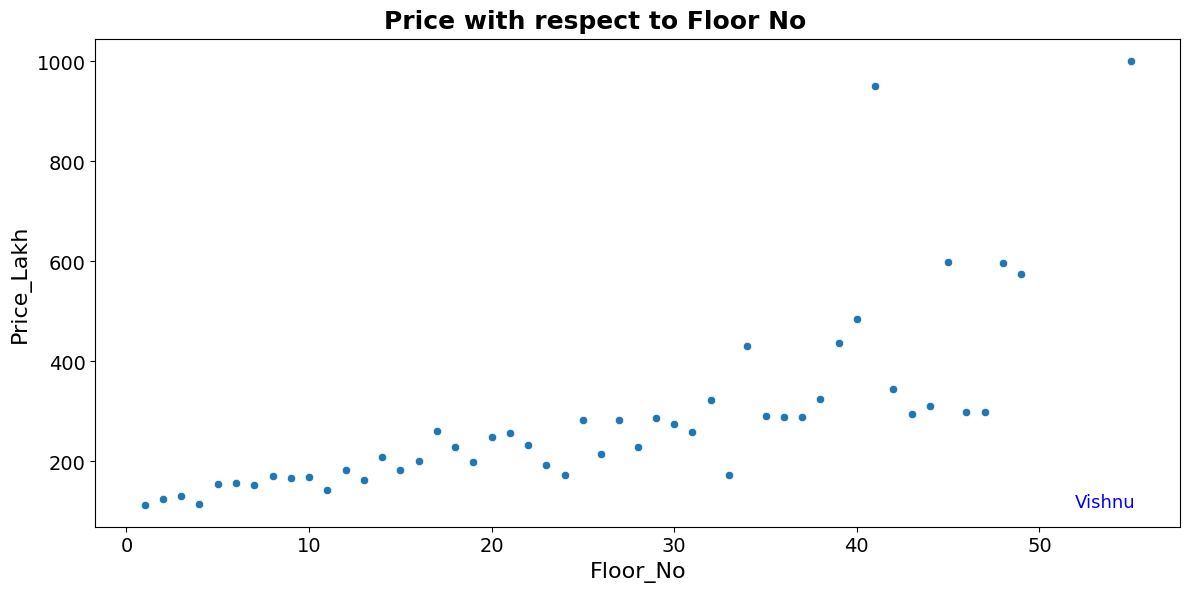

In [152]:
fig = plt.figure(figsize=(12,6))

group_full = prop.groupby('Floor_No')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Floor_No'] > 0]
group = group[group['Floor_No'] < 60]

x = group['Floor_No']
y = group['Price_Lakh']
fig.suptitle('Price with respect to Floor No', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Vishnu',fontsize = 13, color ='blue')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('FloorNo_Price_Scatter', dpi = 500)

### From above visualization we have concluded following points for higher Price.

   1. As number of bedroom increased price also has incresed
   2. As floor number goes higher price also increased
   3. 4 BHK and 5 BHK price higher
   4. Plot Area criteria is higher price
   5. Upcoming New Project prices are higher

## 8. Continous Variables

In [153]:
for i in continous_variable:
    print("Length of", i,":", len(prop[i].unique()))

### 8.1 Price with respect to SqFt Area

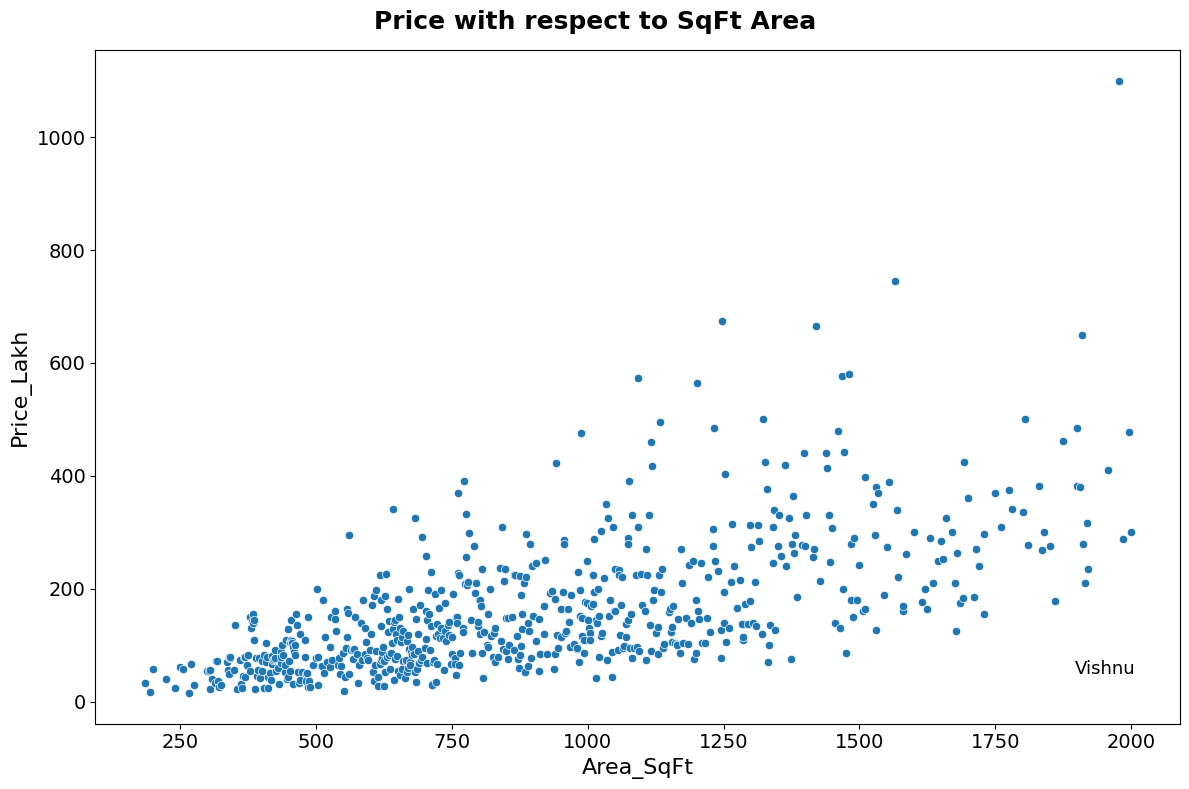

In [154]:
fig = plt.figure(figsize=(12,8))

group_full = prop.groupby('Area_SqFt')['Price_Lakh'].mean()
group = group_full.reset_index()
group = group[group['Area_SqFt'] > 0]
group = group[group['Area_SqFt'] < 2000]

x = group['Area_SqFt']
y = group['Price_Lakh']
fig.suptitle('Price with respect to SqFt Area', fontsize= 18 , fontweight='bold')
fig.text(0.9, 0.15, 'Vishnu',fontsize = 13, color ='black')
sns.scatterplot(x=x, y=y)

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('SqFt_Area_Price_Scatter', dpi = 500)

## 9. Target Varible

In [156]:
prop['Price_Cat'] = pd.cut(x = prop['Price_Lakh'], bins = [13,70,190,16500], labels=['Low','Medium','High'], right = False)
prop.Price_Cat.value_counts()

Price_Cat
Medium    1190
High       674
Low        670
Name: count, dtype: int64

### Checking for Imbalanced or balanced dataset with regards to the Target

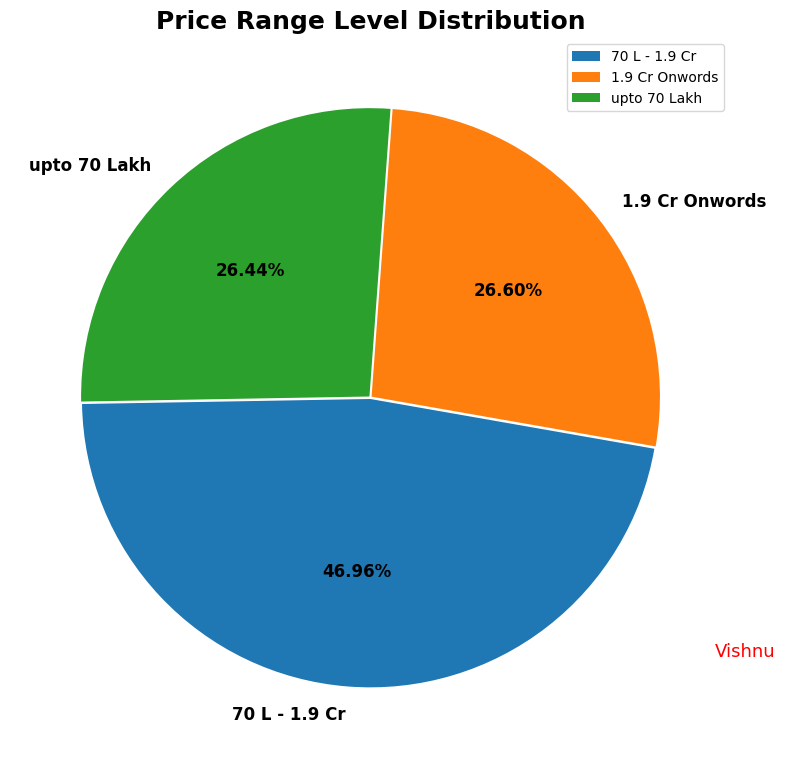

In [157]:
fig = plt.figure(figsize = (8,8))

plt.pie(prop['Price_Cat'].value_counts(), labels= ['70 L - 1.9 Cr','1.9 Cr Onwords','upto 70 Lakh'],
        explode= [0.005,0.005,0.005], autopct= '%.2f%%', startangle= 181, textprops= {'size':'large','fontweight':'bold'})
plt.legend(loc= 'upper right')
plt.title("Price Range Level Distribution", fontsize = 18, fontweight = 'bold')
fig.text(0.9, 0.15, 'Vishnu', fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Range_Distribution', dpi = 500)

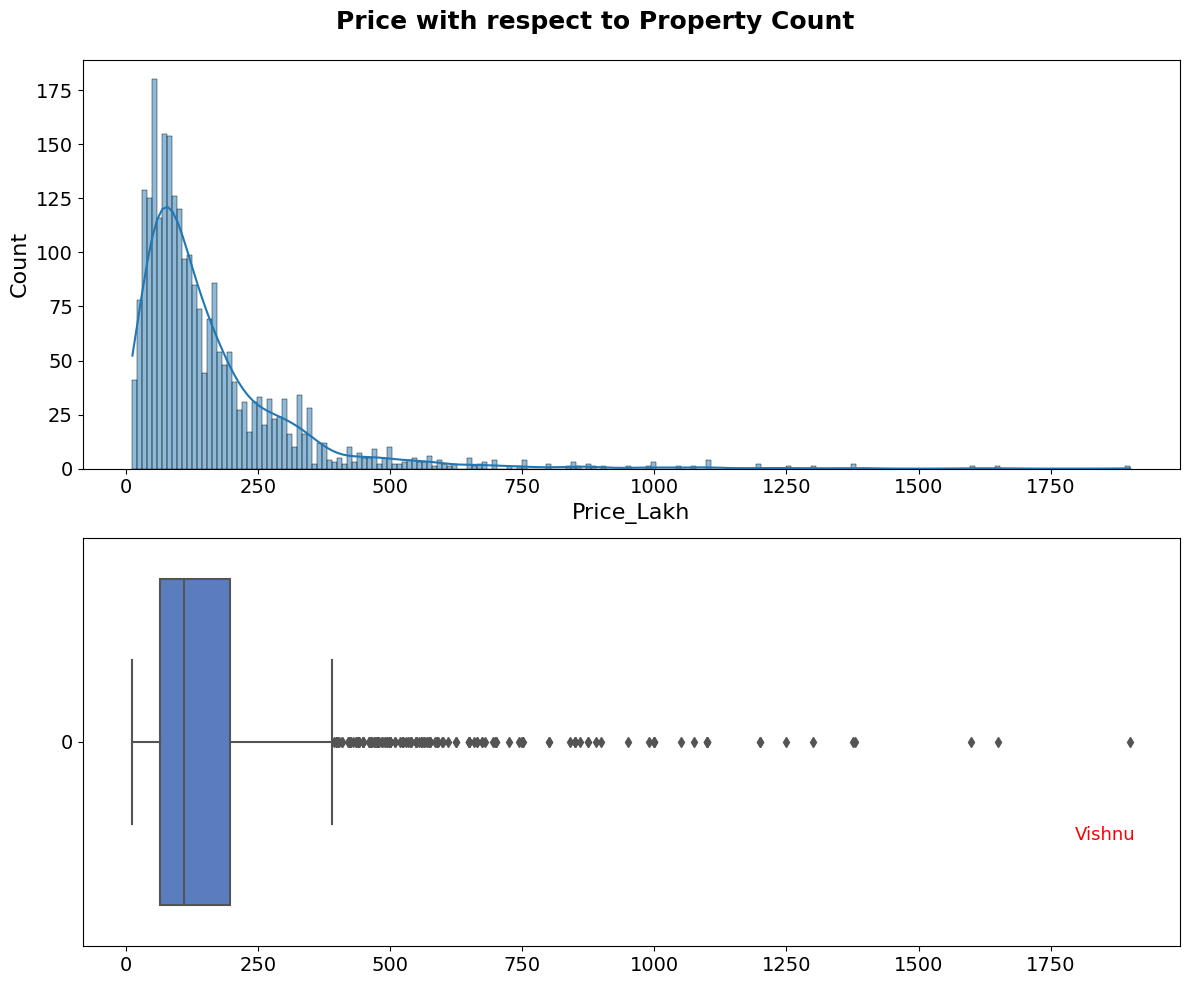

In [158]:
fig, ax = plt.subplots(2,1, figsize = (12,10))

fig.suptitle('Price with respect to Property Count', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Vishnu',fontsize = 13, color ='red')
sns.histplot(ax= ax[0],data=prop["Price_Lakh"], kde =  True, bins = 200)
sns.boxplot(ax= ax[1], data=prop["Price_Lakh"], orient="h", palette='muted')

pylab.rcParams.update(rcParams)
fig.tight_layout()
fig.subplots_adjust(top=0.93)
plt.show()

#fig.savefig('Price_Count_Bar', dpi = 500)

## 10. Bar plot Region wise Price

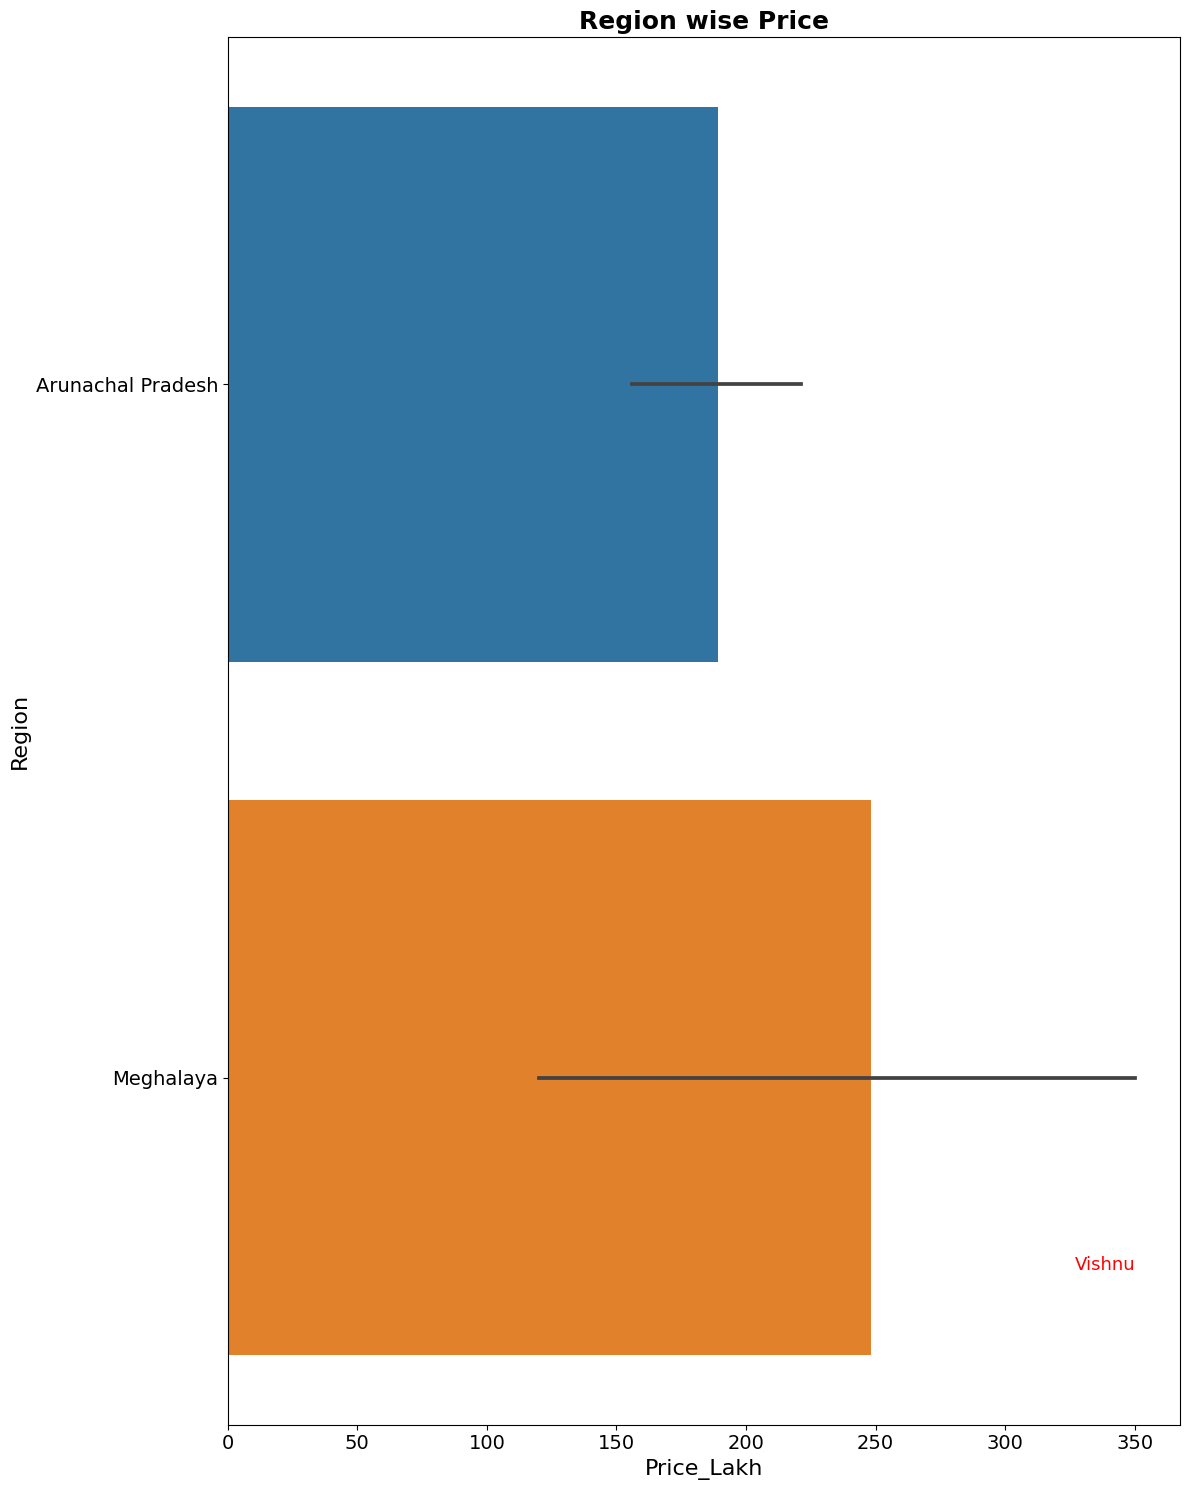

In [159]:
fig  = plt.figure(figsize=(12,15))
sns.barplot(x='Price_Lakh',y='Region',data=prop.head(50))
plt.title('Region wise Price', size = 18, fontweight="bold")
fig.text(0.9, 0.15, 'Vishnu',fontsize = 13, color ='red')

pylab.rcParams.update(rcParams)
fig.tight_layout()
plt.show()

#fig.savefig('Region_wise_Price_Bar', dpi = 500)

## 11. Check for a given Region how does the 2 BHK and 3 BHK Property Prices look like

In [160]:
prop.Region.nunique()

28

In [161]:
def plot_scatter_chart1(prop,Region):
    fig  = plt.figure(figsize=(10,7))
    bhk2 = prop[(prop.Region==Region) & (prop.Bedroom==2)]
    bhk3 = prop[(prop.Region==Region) & (prop.Bedroom==3)]
    bhk4 = prop[(prop.Region==Region) & (prop.Bedroom==4)]
    plt.rcParams['figure.figsize'] = (14,12)
    sns.scatterplot(x=bhk2.Area_SqFt,y=bhk2.Price_Lakh,marker='p',color='blue',label='2 BHK',s=100)
    sns.scatterplot(x=bhk3.Area_SqFt,y=bhk3.Price_Lakh,marker='o',color='red',label='3 BHK',s=100)
    sns.scatterplot(x=bhk4.Area_SqFt,y=bhk4.Price_Lakh,marker='*',color='green',label='4 BHK',s=300)
    plt.xlabel("Total Square Feet Area", )
    plt.ylabel("Price (Lakhs Indian Rupees)")
    plt.title(Region, fontsize = 18, fontweight="bold")
    fig.text(0.9, 0.15,'Vishnu', fontsize = 13, color ='blue')
    
      
    pylab.rcParams.update(rcParams)
    plt.legend(fontsize = 12)
    fig.tight_layout()
    fig.subplots_adjust(top=0.90)
    #fig.savefig(Region, dpi = 500)

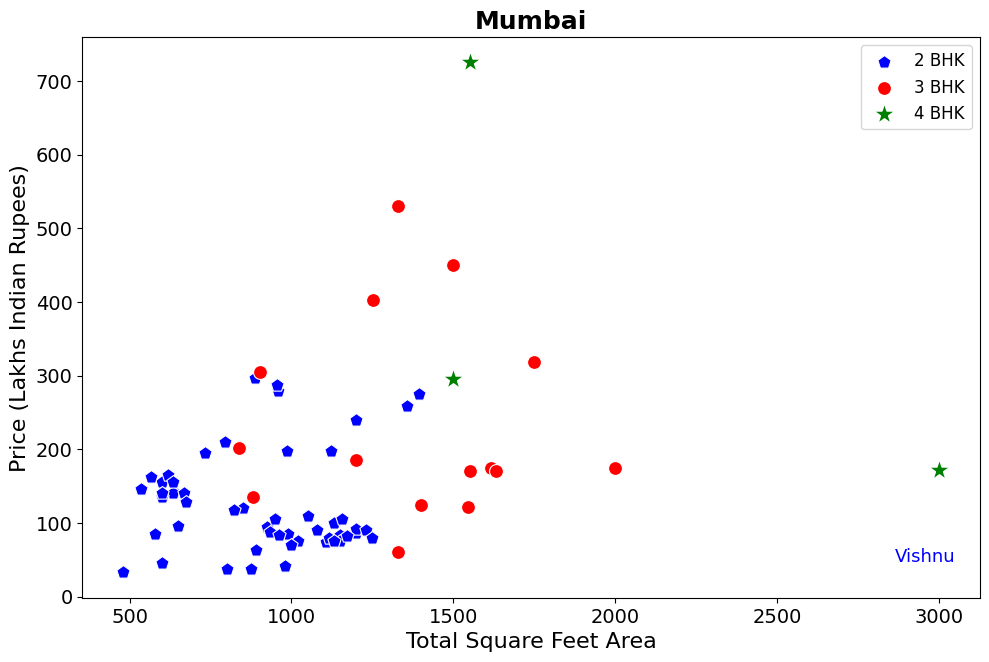

In [162]:
plot_scatter_chart1(prop,"Mumbai")

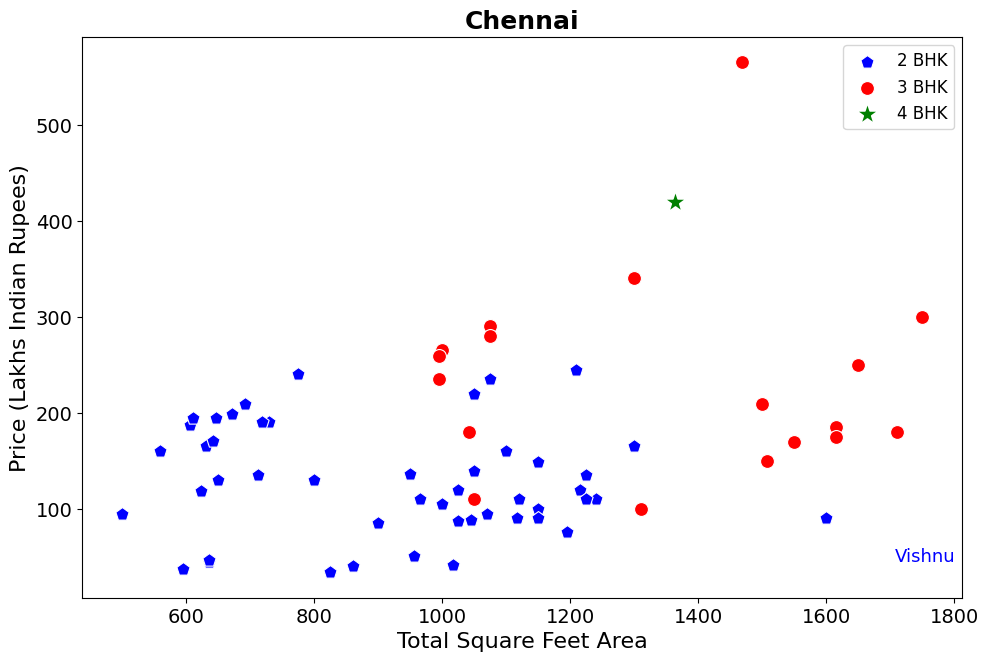

In [163]:
plot_scatter_chart1(prop,"Chennai")

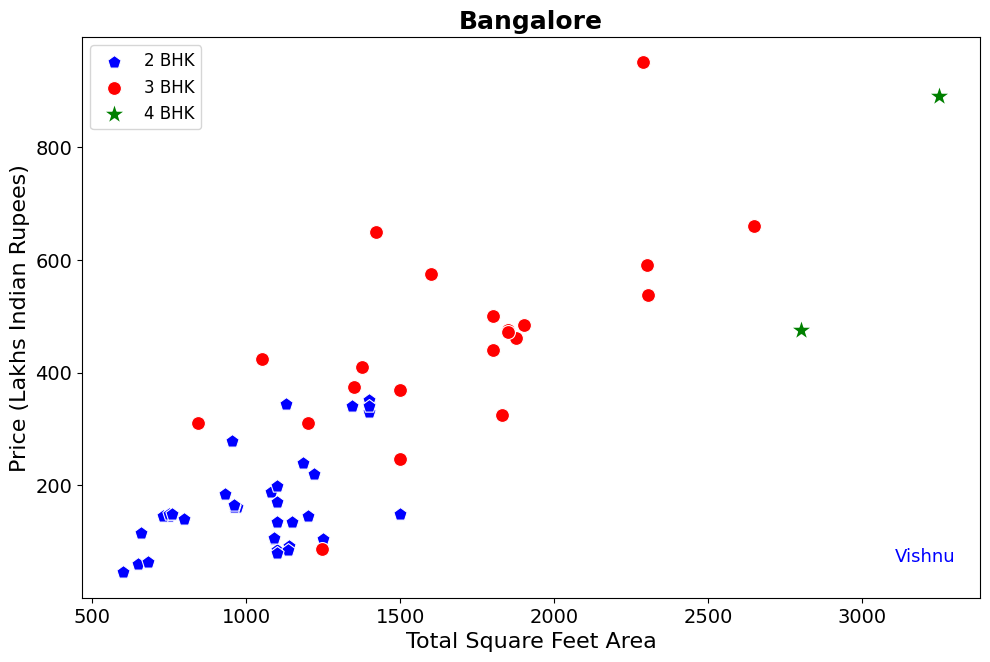

In [164]:
plot_scatter_chart1(prop,"Bangalore")

# The End !!